# **Setup**

In [11]:
!pip install gspread gspread_dataframe

# Authenticate with your Google account
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import get_as_dataframe
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Authorize access to Google Sheets
creds, _ = default()
gc = gspread.authorize(creds)

# **Set Up Data**

In [26]:
# Open the spreadsheet by its name
sh = gc.open("Lifting Progress")

# Select the sheet (tab) called "Master Data Base"
worksheet = sh.worksheet("Matser Data Base")

# Convert the sheet into a pandas DataFrame
df = get_as_dataframe(worksheet, evaluate_formulas=True, dtype=str)

# Drop completely empty rows/columns (common in Sheets)
df = df.dropna(how="all").reset_index(drop=True)

# Convert columns to proper dtypes
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Sets"] = pd.to_numeric(df["Sets"], errors="coerce")
df["Weight"] = pd.to_numeric(df["Weight"], errors="coerce")
df["Reps"] = pd.to_numeric(df["Reps"], errors="coerce")
df["Days"] = (df["Date"] - df["Date"].min()).dt.days

# **Plot Data**

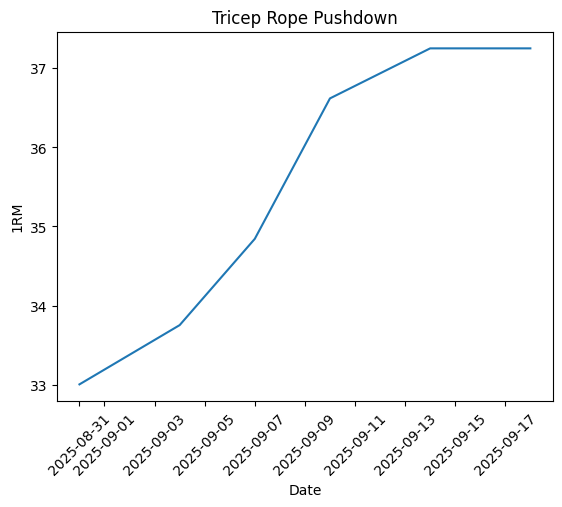

In [28]:
def plotOneRepMax(Exercise):
    #Function to make line plot of One Rep Max vs Time for an exercise

    exerciseData = df[df["Exercise"] == Exercise]
    exerciseDataThree = exerciseData[exerciseData["Sets"] == 3]

    # Use Brzycki formula to calc 1RM
    oneRepMax = exerciseDataThree["Weight"] / (1.0278 - ( 0.0278 * exerciseDataThree["Reps"]))

    plt.plot(exerciseDataThree["Date"], oneRepMax)
    plt.xlabel("Date")
    plt.xticks(rotation=45)  # or 90 for vertical
    plt.ylabel("1RM")
    plt.title(Exercise)
    plt.show()
    return

plotOneRepMax("Tricep Rope Pushdown")

# **Show Stats**

In [29]:
# Convert columns to proper dtypes
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Sets"] = pd.to_numeric(df["Sets"], errors="coerce")
df["Weight"] = pd.to_numeric(df["Weight"], errors="coerce")
df["Reps"] = pd.to_numeric(df["Reps"], errors="coerce")
df["Days"] = (df["Date"] - df["Date"].min()).dt.days

# print(df.head())   # Show first few rows

def findCorrelation(Exercise):
    #Function that finds spearman correlation coefficent between 1RM and Time

    exerciseData = df[df["Exercise"] == Exercise]
    exerciseDataThree = exerciseData[exerciseData["Sets"] == 3]

    oneRepMax = exerciseDataThree["Weight"] / (1.0278 - ( 0.0278 * exerciseDataThree["Reps"]))

    corr, _ = spearmanr(exerciseDataThree["Days"], oneRepMax)
    return corr

def findPValue(Exercise):
    #Function that finds spearman correlation coefficent between 1RM and Time

    exerciseData = df[df["Exercise"] == Exercise]
    exerciseDataThree = exerciseData[exerciseData["Sets"] == 3]

    oneRepMax = exerciseDataThree["Weight"] / (1.0278 - (0.0278 * exerciseDataThree["Reps"]))

    _, pValue = spearmanr(exerciseDataThree["Days"], oneRepMax)
    return pValue


exerciseList = df["Exercise"].unique().tolist()


# Make new data frame with spearman correlation and P Values
corrValues = {
    'Exercise': exerciseList,
    'Corr': [findCorrelation(exercise) for exercise in exerciseList],
    'pValue': [findPValue(exercise) for exercise in exerciseList]
}

df = pd.DataFrame(corrValues)

df_sorted = df.sort_values(by = 'Corr', ascending = True)

print(df_sorted)



                 Exercise      Corr    pValue
8           Incline Press -0.239046  0.648261
6    Tricpe Overhead Rope  0.169031  0.748868
0           Lat Pull Down  0.212512  0.686031
2     Baysian Cable Curls  0.576818  0.230732
9          Shoulder Press  0.654654  0.158302
5    Cable Lateral Raises  0.898645  0.014889
3   Preacher Curl Machine  0.941124  0.005098
1              Seated Row  0.942857  0.004805
10            Fly Machine  0.942857  0.004805
4       Rear Delt Machine  0.985611  0.000309
7    Tricep Rope Pushdown  0.985611  0.000309
